<a href="https://colab.research.google.com/github/DimkoDynamite/coffe_cup/blob/main/%D0%A1%D1%82%D0%B0%D0%B6%D0%B8%D1%80%D0%BE%D0%B2%D0%BA%D0%B0_Object_Detection_TerraYolo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Установка TerraYolo, импорт необходимых библиотек

In [1]:
!pip install TerraYolo

In [2]:
import os
import random
import cv2
import matplotlib.pyplot as plt
from PIL import Image
from TerraYolo.TerraYolo import TerraYoloV5

### Подготовка рабочего каталога, загрузка и распаковка датасета

In [3]:
# Просмотр рабочего каталога
os.getcwd()

'/content'

In [4]:
# Задание имени рабочего каталога
TRAIN_DIR = '/content/x-ray/'

# Создание рабочего каталога
os.mkdir(TRAIN_DIR)

In [5]:
# Подключаем Гугл диск
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
# Распаковка и удаление архива
!unzip -q -o /content/drive/MyDrive/Стажировка/x-ray.zip

### Подготовка к обучению, создание модели

In [6]:
# Задание пути к yaml-файлу
data_path = TRAIN_DIR +'data.yaml' #сохраним путь к файлу в отдельную переменную

# Просмотр содержимого yaml-файла
!cat {data_path}

cat: /content/x-ray/data.yaml: No such file or directory


In [7]:
# Просмотр списка файлов аннотаций проверочной выборки
!ls {TRAIN_DIR+'valid'}/labels

ls: cannot access '/content/x-ray/valid/labels': No such file or directory


In [9]:
# Выведем количество файлов в рабочих директориях
print(len(os.listdir(TRAIN_DIR+'train/images/')))
print(len(os.listdir(TRAIN_DIR+'train/labels/')))
print(len(os.listdir(TRAIN_DIR+'valid/images/')))
print(len(os.listdir(TRAIN_DIR+'valid/labels/')))

288
288
48
48


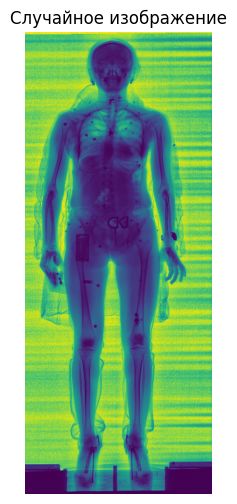

['0 0.307161 0.466916 0.076042 0.062568\n', '0 0.183021 0.533347 0.031563 0.025895\n']


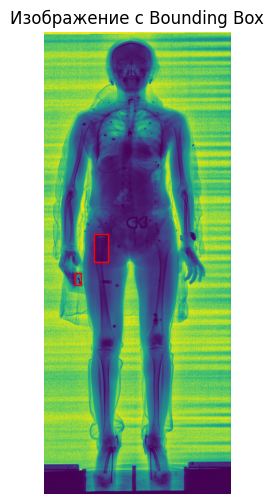

In [10]:
# Выбор случайного изображения
random_image_filename = random.choice(os.listdir(TRAIN_DIR+'train/images/'))
image_path = os.path.join(TRAIN_DIR, 'train/images/', random_image_filename)

# Отображение случайного изображения
image = Image.open(image_path)
plt.figure(figsize=(6, 6))
plt.imshow(image)
plt.title("Случайное изображение")
plt.axis('off')
plt.show()

# Получение соответствующего файла с координатами
label_filename = os.path.splitext(random_image_filename)[0] + '.txt'
label_path = os.path.join(TRAIN_DIR, 'train/labels/', label_filename)

if os.path.exists(label_path):
  # Чтение координат из файла
  with open(label_path, 'r') as label_file:
      lines = label_file.readlines()
  print(lines)
  # Отображение изображения с bounding box
  plt.figure(figsize=(6, 6))
  plt.imshow(image)

  for line in lines:
      values = line.strip().split()[1:]
      if len(values) == 4:
          x, y, width, height = map(float, values)
          x *= image.width
          y *= image.height
          width *= image.width
          height *= image.height
          rect = plt.Rectangle((x - width / 2, y - height / 2), width, height,
                                linewidth=1, edgecolor='r', facecolor='none')
          plt.gca().add_patch(rect)

  plt.title("Изображение с Bounding Box")
  plt.axis('off')
  plt.show()
else:
  print('Объектов на изображении нет')

In [9]:
# создаем экземпляр класса my_terra_yolov5
my_terra_yolov5 = TerraYoloV5(work_dir=TRAIN_DIR)

In [13]:
# Вывод числа объектов в датасете
my_terra_yolov5.count_labels(data_path)

lab_dir /content/x-ray/train/labels
в каталоге /content/x-ray/train/labels найдены описания: [671] классов: [0]
lab_dir /content/x-ray/valid/labels
в каталоге /content/x-ray/valid/labels найдены описания: [78] классов: [0]


### Задание параметров, обучение модели и сохранинение весов

In [25]:
# Задание параметров обучения модели
train_dict=dict()
train_dict['epochs'] = 3
train_dict['data'] = data_path

In [ ]:
# В режиме 'train' запустим обучение с задаными параметрами
my_terra_yolov5.run(train_dict, exp_type='train')

Дообучение с последними весами

In [25]:
train_dict=dict()
train_dict['weights'] = '/content/drive/MyDrive/yolo_weights/x-ray/best.pt' #веса последней эпохи
train_dict['epochs'] = 150
train_dict['data'] = data_path
my_terra_yolov5.run(train_dict, exp_type='train')

command python /content/x-ray/yolov5/train.py --weights /content/drive/MyDrive/yolo_weights/x-ray/best.pt --epochs 150 --data /content/x-ray/data.yaml
train: weights=/content/drive/MyDrive/yolo_weights/x-ray/best.pt, cfg=, data=/content/x-ray/data.yaml, hyp=x-ray/yolov5/data/hyps/hyp.scratch-low.yaml, epochs=150, batch_size=16, imgsz=640, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=None, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=x-ray/yolov5/runs/train, name=exp, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, seed=0, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
github: up to date with https://github.com/ultralytics/yolov5 ✅
YOLOv5 🚀 v7.0-223-g005dcfa Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)

hyperparameters: lr0=0.01, lrf

In [26]:
# Сохраним путь к нашему диску в переменную
my_drv_path = '/content/drive/MyDrive/'
!mkdir {my_drv_path}/yolo_weights/x-ray
# Сохраним путь в переменную
best_weights_path = my_terra_yolov5.exp_dict['train']['last_exp_path']+'/weights/best.pt'
!cp {best_weights_path} {my_drv_path+'/yolo_weights/x-ray'}

Детекция

In [11]:
test_dict = dict()
test_dict['source'] = '/content/'
test_dict['conf'] = 0.5                                                    # порог вероятности обнаружения объекта
test_dict['weights'] = '/content/drive/MyDrive/yolo_weights/x-ray/best.pt' #путь к весам модели

my_terra_yolov5.run(test_dict, exp_type='test')

command python /content/x-ray/yolov5/detect.py --source /content/ --conf 0.5 --weights /content/drive/MyDrive/yolo_weights/x-ray/best.pt
detect: weights=['/content/drive/MyDrive/yolo_weights/x-ray/best.pt'], source=/content/, data=x-ray/yolov5/data/coco128.yaml, imgsz=[640, 640], conf_thres=0.5, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_csv=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=x-ray/yolov5/runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-224-g6262c7f Python-3.10.12 torch-2.0.1+cu118 CPU

Fusing layers...
Model summary: 157 layers, 7012822 parameters, 0 gradients, 15.8 GFLOPs
image 1/5 /content/test (1).jpg: 640x288 (no detections), 136.0ms
image 2/5 /content/test (2).jpg: 640x320 (no detections), 133.4ms
image 3/5 /content/test (3).jpg: 640x288 4 Dangers, 

img_path /content/x-ray/yolov5//runs/detect//exp2


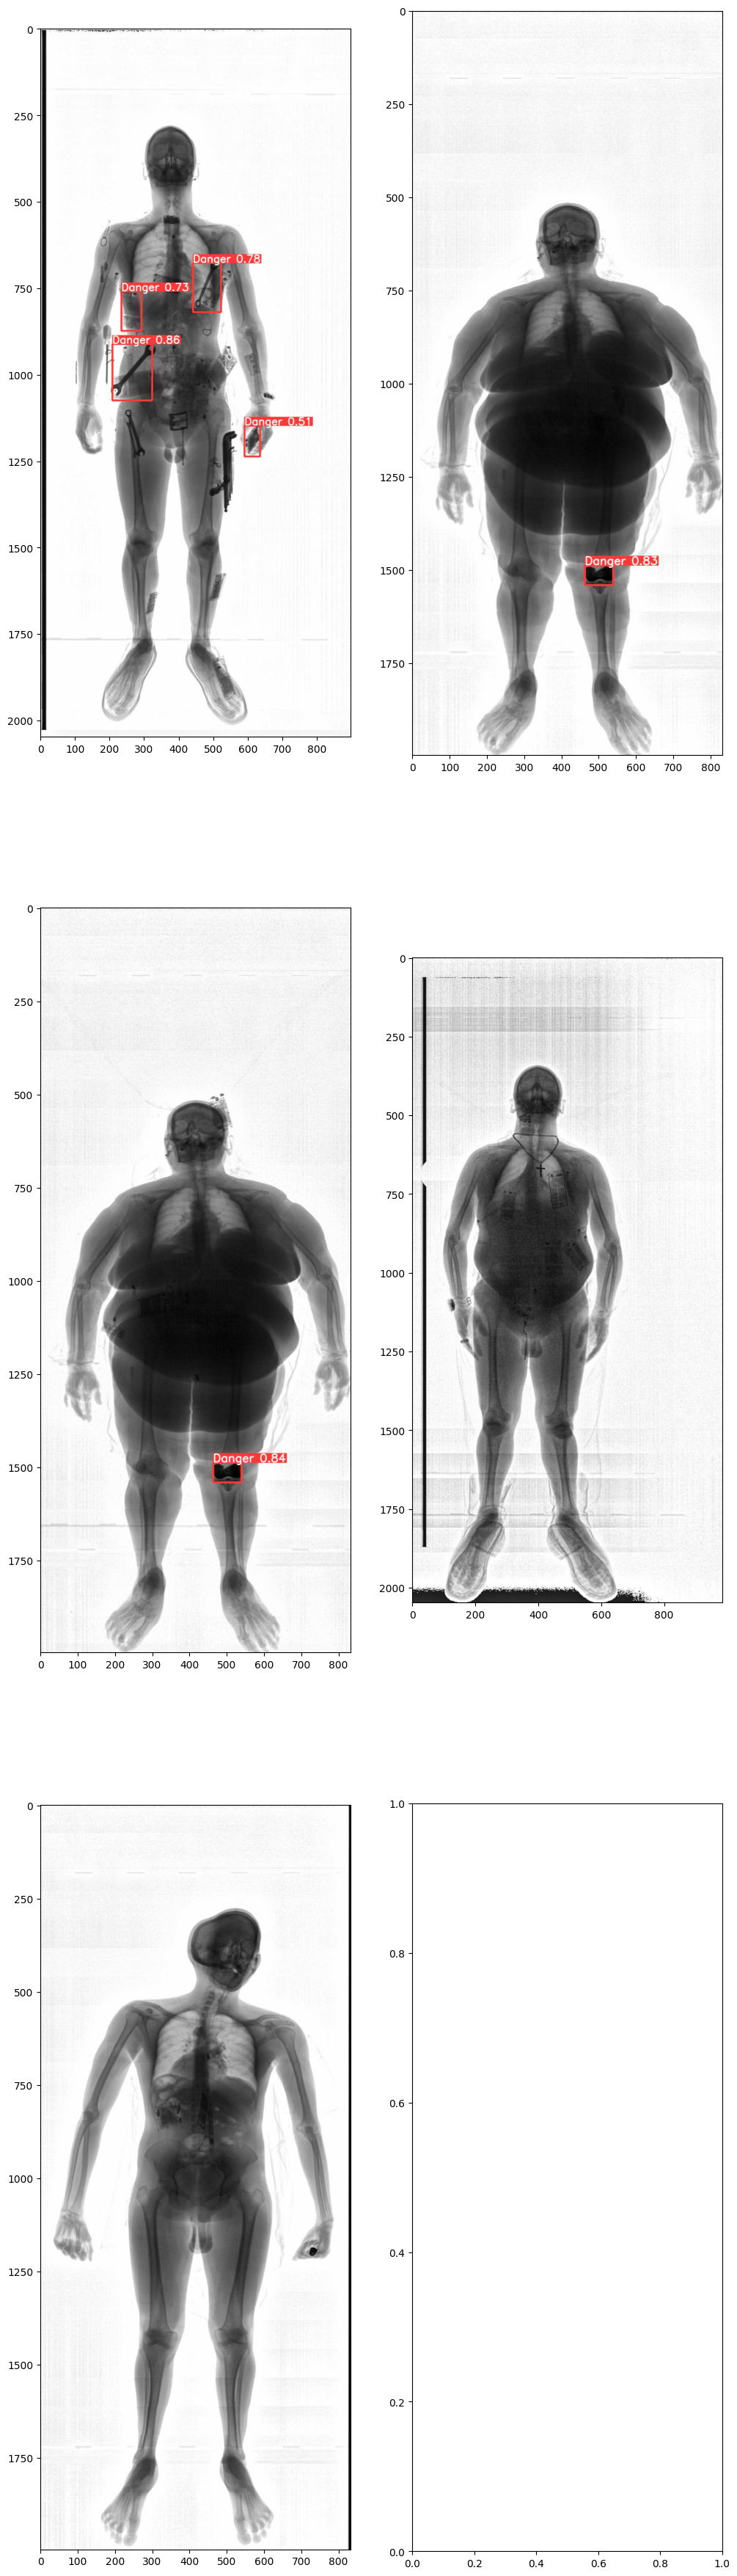

In [20]:
my_terra_yolov5.show_test_images(n_samples=5, ncols= 2, img_size = (6, 15))

In [ ]:
from PIL import Image
import glob

for name in glob.glob('x-ray/yolov5/runs/detect/exp2/*.tiff'):
    im = Image.open(name)
    name = str(name).rstrip(".tiff")
    im.save(name + '.jpg', 'JPEG')
